In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import os
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import time
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.reshape(60000, 784) 
xtrain = xtrain.astype(np.float32)
xtrain /= 255
xtest = xtest.reshape(10000, 784)
xtest = xtest.astype(np.float32)
xtest/= 255
# Number of classes, one class for each of 10 digits.
num_classes = 10
ytest = np_utils.to_categorical(ytest,num_classes)
ytrain = np_utils.to_categorical(ytrain,num_classes)

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
# using SGD
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 47s - loss: 0.8136 - acc: 0.7312 - val_loss: 0.3349 - val_acc: 0.9036
Epoch 2/20
 - 43s - loss: 0.5642 - acc: 0.8263 - val_loss: 0.3057 - val_acc: 0.9078
Epoch 3/20
 - 43s - loss: 0.5194 - acc: 0.8401 - val_loss: 0.2654 - val_acc: 0.9249
Epoch 4/20
 - 42s - loss: 0.4991 - acc: 0.8473 - val_loss: 0.2663 - val_acc: 0.9224
Epoch 5/20
 - 43s - loss: 0.4849 - acc: 0.8520 - val_loss: 0.2591 - val_acc: 0.9280
Epoch 6/20
 - 43s - loss: 0.4674 - acc: 0.8586 - val_loss: 0.2479 - val_acc: 0.9308
Epoch 7/20
 - 38s - loss: 0.4655 - acc: 0.8606 - val_loss: 0.2434 - val_acc: 0.9321
Epoch 8/20
 - 33s - loss: 0.4622 - acc: 0.8599 - val_loss: 0.2497 - val_acc: 0.9325
Epoch 9/20
 - 33s - loss: 0.4536 - acc: 0.8626 - val_loss: 0.2440 - val_acc: 0.9339
Epoch 10/20
 - 34s - loss: 0.4517 - acc: 0.8620 - val_loss: 0.2449 - val_acc: 0.9313
Epoch 11/20
 - 35s - loss: 0.4445 - acc: 0.8656 - val_loss: 0.2390 - val_acc: 0.9348
Epoch 12/20
 - 33s - los

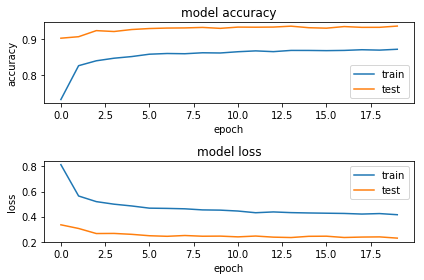

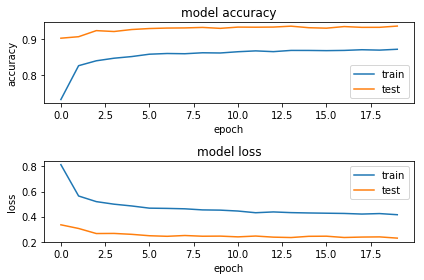

In [9]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(BatchNormalization())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))
# using SGD
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 65s - loss: 0.3947 - acc: 0.8793 - val_loss: 0.2306 - val_acc: 0.9319
Epoch 2/20
 - 57s - loss: 0.2641 - acc: 0.9200 - val_loss: 0.2373 - val_acc: 0.9214
Epoch 3/20
 - 58s - loss: 0.2377 - acc: 0.9281 - val_loss: 0.1937 - val_acc: 0.9401
Epoch 4/20
 - 58s - loss: 0.2229 - acc: 0.9339 - val_loss: 0.1770 - val_acc: 0.9457
Epoch 5/20
 - 57s - loss: 0.2104 - acc: 0.9365 - val_loss: 0.1701 - val_acc: 0.9488
Epoch 6/20
 - 57s - loss: 0.2037 - acc: 0.9386 - val_loss: 0.1752 - val_acc: 0.9446
Epoch 7/20
 - 56s - loss: 0.1947 - acc: 0.9403 - val_loss: 0.1675 - val_acc: 0.9484
Epoch 8/20
 - 57s - loss: 0.1915 - acc: 0.9430 - val_loss: 0.1709 - val_acc: 0.9455
Epoch 9/20
 - 56s - loss: 0.1831 - acc: 0.9447 - val_loss: 0.1595 - val_acc: 0.9513
Epoch 10/20
 - 57s - loss: 0.1825 - acc: 0.9445 - val_loss: 0.1584 - val_acc: 0.9526
Epoch 11/20
 - 57s - loss: 0.1786 - acc: 0.9449 - val_loss: 0.1554 - val_acc: 0.9510
Epoch 12/20
 - 57s - los

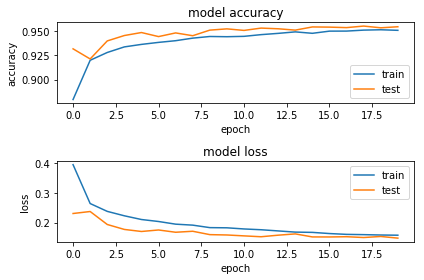

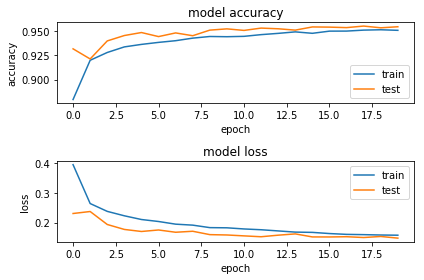

In [11]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig